In [1]:
import pandas as pd, numpy, scipy
import sklearn, sklearn.preprocessing, sklearn.decomposition
import matplotlib, matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

input_file = 'C:/Users/79516/Downloads/DESeq2_TPM_values.tsv'

In [2]:
expression = pd.read_csv(input_file, sep='\t', index_col=0)
expression = expression.filter(regex='^073', axis=1)

print(expression.shape)
expression

(40320, 30)


,073_114,073_115,073_116,073_117,073_118,073_119,073_120,073_121,073_122,073_123,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,35.906809,31.938388,28.883981,43.596910,33.984692,32.198999,35.185194,34.600479,34.299543,35.332225,...,38.878165,34.539854,36.341524,36.358163,35.662062,39.354423,36.897123,40.268850,40.243493,39.279878
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033733,0.053681,0.054686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,47.683476,77.131702,78.609848,67.090474,81.335528,84.013684,81.626058,78.569781,76.439853,77.589006,...,49.313600,74.750882,73.621733,88.938917,84.652970,78.607037,77.642204,78.861113,74.648598,56.894679
ENSG00000000457,4.337263,3.949651,4.400162,4.617074,5.032846,4.603494,3.830178,3.654271,4.130113,4.032753,...,3.751108,4.686774,4.408532,4.283488,5.221377,4.081310,4.327263,4.538531,4.417790,3.793313
ENSG00000000460,5.689600,3.709494,5.157470,13.021706,4.386287,4.029393,4.069694,3.527497,4.842220,3.713090,...,4.732061,4.222485,3.397340,3.719525,3.375133,3.705756,3.933664,3.627546,3.490585,5.726682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286261,3.016605,4.211094,3.016046,3.587785,3.406454,3.268076,3.750101,3.095595,3.496301,3.461232,...,3.175727,3.208048,3.051978,4.661742,3.624199,3.160171,3.502509,4.057444,3.266823,2.816905
ENSG00000286264,3.565990,3.537869,3.665634,4.040888,3.882212,4.699214,4.396297,3.851323,3.471666,3.691466,...,3.843893,3.481138,4.733761,5.631273,3.520212,3.984557,4.859894,3.126438,3.854971,3.886703
ENSG00000286265,2.308834,2.326969,2.268726,3.260720,2.885310,3.850129,4.571480,3.504572,2.697294,3.098562,...,2.891272,2.048150,3.144443,3.813912,2.308239,3.848015,4.044782,3.206352,3.279666,3.389409


In [3]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100] 

print(substantial_expression.shape)
print(high_expression.shape) 

(14369, 30)
(2341, 30)


In [4]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1) 

In [5]:

scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained) 

[0.70385186 0.10019942]


In [6]:
log2_tpm_PO = numpy.log2(expression + 1)
log2_tpm_PO.head()

,073_114,073_115,073_116,073_117,073_118,073_119,073_120,073_121,073_122,073_123,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,5.205815,5.041698,4.901300,5.478872,5.128652,5.053068,5.177328,5.153825,5.141578,5.183178,...,5.317527,5.151366,5.222709,5.223352,5.196216,5.334655,5.244016,5.366981,5.366095,5.331987
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047863,0.075438,0.076813,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,5.605360,6.287836,6.314875,6.089381,6.363443,6.409623,6.368525,6.314149,6.275004,6.296256,...,5.652877,6.243191,6.221524,6.490874,6.420431,6.314824,6.297232,6.319421,6.241241,5.855359
ENSG00000000457,2.416100,2.307327,2.433003,2.489819,2.592839,2.486327,2.272076,2.218555,2.358991,2.331348,...,2.248264,2.507611,2.435237,2.401491,2.637234,2.345200,2.413395,2.469503,2.437704,2.261023
ENSG00000000460,2.741920,2.235572,2.622338,3.809590,2.429291,2.330384,2.341899,2.178714,2.546517,2.236673,...,2.519054,2.384736,2.136631,2.238642,2.129327,2.234427,2.302659,2.210247,2.166903,2.749895


C:\Users\79516\AppData\Local\Temp\ipykernel_21684\529553368.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_clean["time_label"].fillna("unknown", inplace=True)


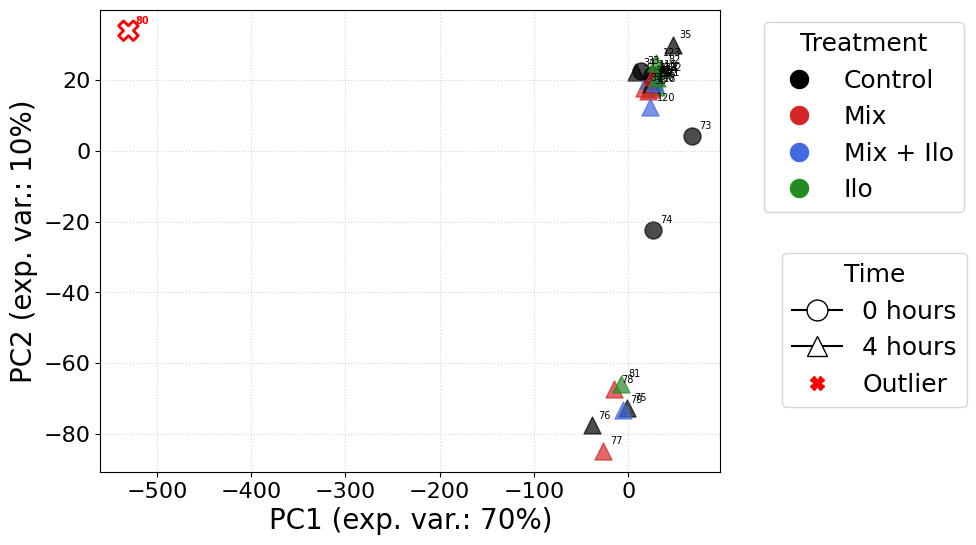

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

meta = pd.read_csv("C:/Users/79516/Downloads/metadata.tsv", sep="\t")
meta = meta[meta["run"] == 73]

def remove_one_outlier(data):
    center = np.median(data, axis=0)
    distances = np.linalg.norm(data - center, axis=1)
    outlier_idx = np.argmax(distances)
    mask = np.ones(len(data), dtype=bool)
    mask[outlier_idx] = False
    return data[mask], mask, outlier_idx

new_clean, mask, outlier_idx = remove_one_outlier(new)
clean_indices = np.where(mask)[0]

meta_clean = meta.iloc[clean_indices].reset_index(drop=True)

treatment_map = {
    'Control': 'zero',
    'Mix': 'mix',
    'Mix + Ilo': 'mix_plus_ilo',
    'Ilo': 'ilo_only'
}

meta_clean["treatment_label"] = meta_clean["treatment"].map({v: k for k, v in treatment_map.items()})

colors = {
    'Control': 'black',
    'Mix': 'tab:red',
    'Mix + Ilo': 'royalblue',
    'Ilo': 'forestgreen'
}

time_map = {"zero": '0 hours', "four": '4 hours'}
markers = {'0 hours': 'o', '4 hours': '^'}
meta_clean["time_label"] = meta_clean["time"].map(time_map)
meta_clean["time_label"].fillna("unknown", inplace=True)

plt.figure(figsize=(8, 6))

for i, row in meta_clean.iterrows():
    plt.scatter(
        new_clean[i, 0],
        new_clean[i, 1],
        s=150,
        alpha=0.7,
        color=colors[row["treatment_label"]],
        marker=markers[row["time_label"]]
    )

for sid, (x, y) in zip(meta_clean["sampleID"], new_clean[:, :2]):
    label = sid.split("_")[1]
    plt.annotate(label, (x, y), xytext=(5, 5), textcoords='offset points',
                 fontsize=7, alpha=1)

out_row = meta.iloc[outlier_idx]
plt.scatter(
    new[outlier_idx, 0],
    new[outlier_idx, 1],
    s=200,
    edgecolor="red",
    facecolor="none",
    linewidth=2,
    marker="X",
    label="Outlier"
)

out_label = out_row["sampleID"].split("_")[1]
plt.annotate(out_label,
             (new[outlier_idx, 0], new[outlier_idx, 1]),
             xytext=(5, 5), textcoords='offset points',
             fontsize=7, color="red", fontweight="bold")

plt.xlabel(f'PC1 (exp. var.: {int(explained[0]*100)}%)')
plt.ylabel(f'PC2 (exp. var.: {int(explained[1]*100)}%)')
plt.grid(alpha=0.5, ls=':')

legend1 = plt.legend(
    handles=[Line2D([0], [0], marker='o', color='w',
                    markerfacecolor=colors[t], markersize=15,
                    label=t) for t in colors.keys()],
    title="Treatment", bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.gca().add_artist(legend1)

legend2 = plt.legend(
    handles=[Line2D([0], [0], marker=markers[t], color="k",
                    markerfacecolor="w", markersize=15,
                    label=t) for t in markers.keys()] +
            [Line2D([0],[0], marker="X", color="red", markersize=10, lw=0, label="Outlier")],
    title="Time", bbox_to_anchor=(1.08, 0.5), loc="upper left"
)

plt.show()


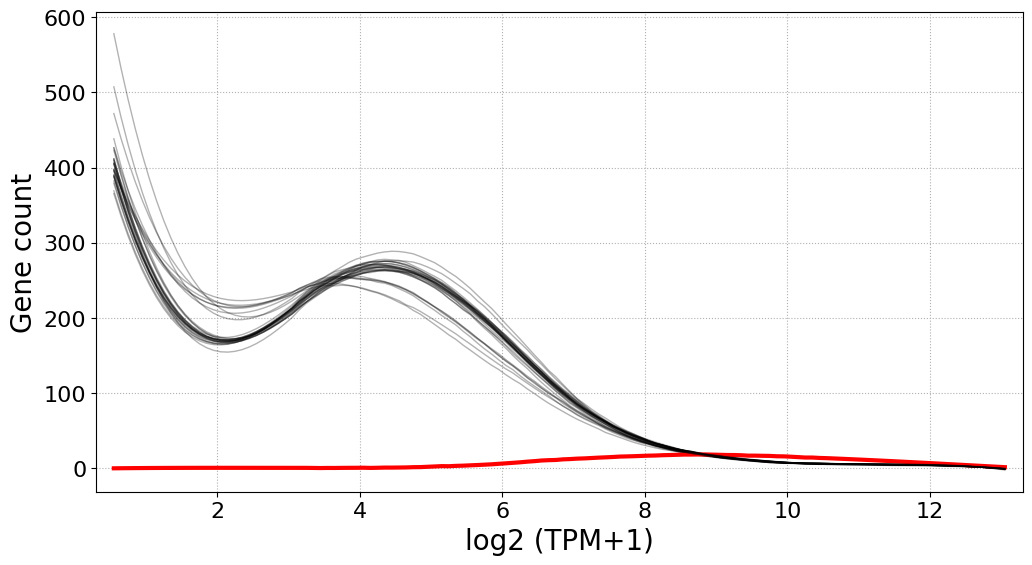

In [ ]:
import scipy.signal

found_max = 15.1
number_of_bins = int(found_max * 10)

absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()

for i, sample in enumerate(working_samples):
    log2TPM = log2_tpm_PO.loc[:, sample]
    if i == outlier_idx:
        the_color = "red"   
        the_alpha = 1
        lw = 3
    else:
        the_color = "black"
        the_alpha = 0.3
        lw = 1

    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)

    hist, bin_edges = np.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0]) / 2
    x = bin_edges[:-1] + half_bin

    plotting_x = x[5:-20]
    plotting_hist = hist[5:-20]

    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    plt.plot(plotting_x, yhat, '-', lw=lw, alpha=the_alpha, color=the_color)

plt.xlim([np.min(plotting_x) - 0.25, np.max(plotting_x) + 0.25])
plt.xlabel('log2 (TPM+1)')
plt.ylabel('Gene count')
plt.grid(ls=':')
plt.tight_layout()
plt.show()